In [ ]:
# Link Trabalho Final : https://www.dropbox.com/s/3fla2xuc8t9xba2/Deep%20Learning%20-%20Lista%20de%20Exerc%C3%ADcios%20v1.4.pdf?dl=0

In [ ]:
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.utils import np_utils
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -larth '/content/drive/MyDrive/__FIAP/MBA - 17IA/Deep Learning & Reinforcement Learning/dados_trabalho_final/'

total 2.2M
-rw------- 1 root root 366K Sep 20  2019 mushrooms.csv
-rw------- 1 root root  12K Oct  1  2019 heart.csv
-rw------- 1 root root 1.3M Aug 26  2020 pulsar_data_train.csv
-rw------- 1 root root 529K Aug 26  2020 pulsar_data_test.csv
-rw------- 1 root root  18K Jun 15 00:26 Eletrical_Production.csv


In [ ]:
import pandas as pd
pulsar_train = pd.read_csv('/content/drive/MyDrive/__FIAP/MBA - 17IA/Deep Learning & Reinforcement Learning/dados_trabalho_final/pulsar_data_train.csv')
pulsar_test = pd.read_csv('/content/drive/MyDrive/__FIAP/MBA - 17IA/Deep Learning & Reinforcement Learning/dados_trabalho_final/pulsar_data_test.csv')

In [ ]:
print("Train shape:",pulsar_train.shape)
print("Test shape:",pulsar_test.shape)

Train shape: (12528, 9)
Test shape: (5370, 9)


In [ ]:
pulsar_train.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

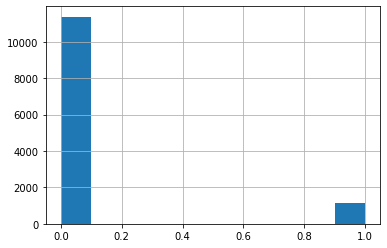

In [ ]:
pulsar_train.target_class.hist(figsize=(6,4))

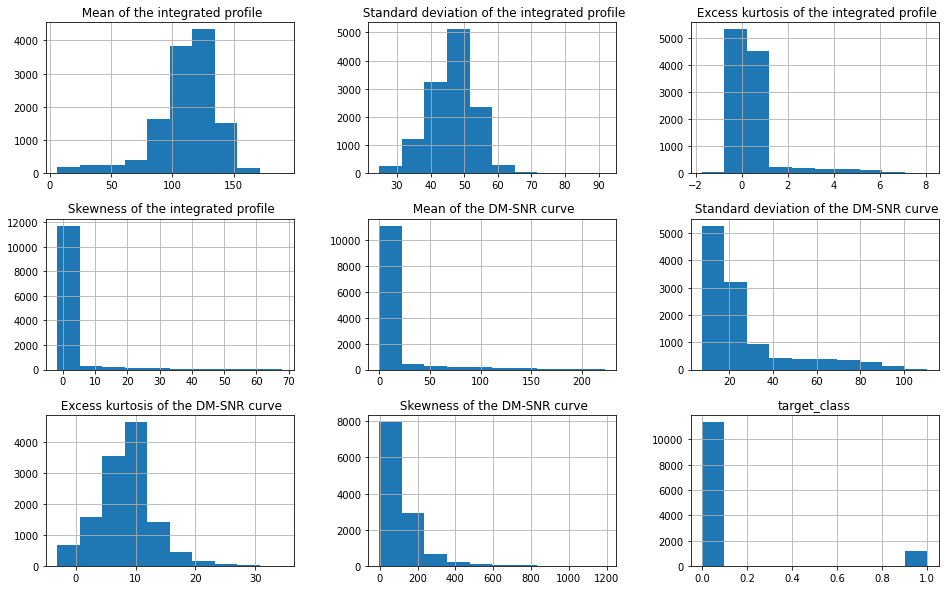

In [ ]:
hist = pulsar_train.hist(bins=10, figsize=(16,10))

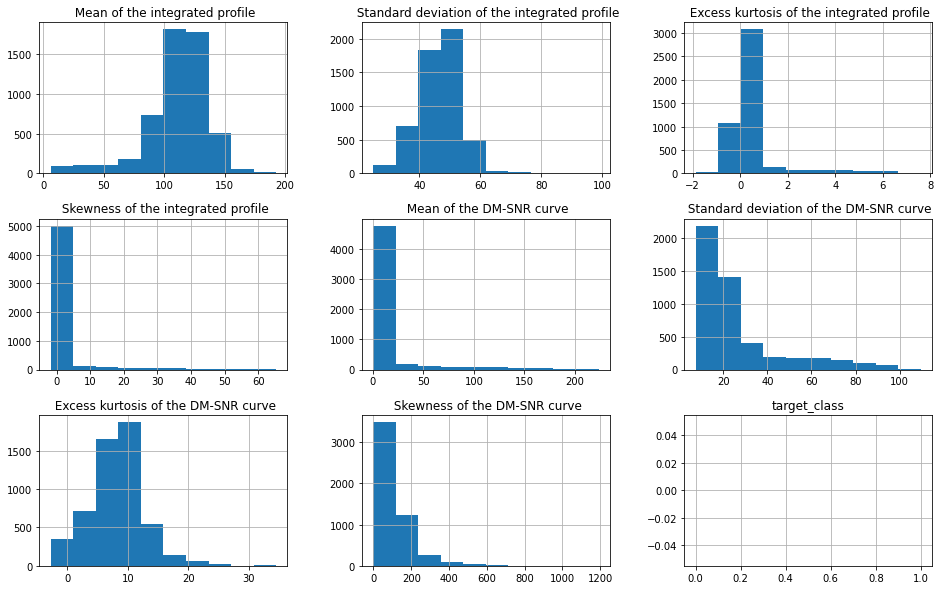

In [ ]:
hist = pulsar_test.hist(bins=10, figsize=(16,10))

In [ ]:
# Separando dados em X e Y
X= pulsar_train.drop('target_class',axis=1).to_numpy()
Y= pulsar_train['target_class'].to_numpy()
print(X.shape, Y.shape, pulsar_train.columns)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,Y,test_size = 0.3 , random_state = 0 )

(12528, 8) (12528,) Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
modelo = Sequential()

modelo.add(Dense(10,input_shape=(8,),activation='tanh'))
modelo.add(Dense(8,activation='tanh'))
modelo.add(Dense(6,activation='tanh'))
modelo.add(Dense(3,activation='softmax'))

modelo.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'SGD' , metrics = ['accuracy'] )

modelo.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 21        
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("Shape X_train:",X_train.shape)
print("Shape X_test:",X_test.shape)
print("Shape y_train:",y_train.shape)
print("Shape y_test:",y_test.shape)
type(X_train)

Shape X_train: (8769, 8)
Shape X_test: (3759, 8)
Shape y_train: (8769,)
Shape y_test: (3759,)


numpy.ndarray

In [ ]:
modelo.fit(X_train , y_train ,epochs = 100)

Epoch 1/100
275/275 [==============================] - 10s 1ms/step - loss: nan - accuracy: 0.9052
Epoch 2/100
275/275 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9013
Epoch 3/100
275/275 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9099
Epoch 4/100
275/275 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9109
Epoch 5/100
275/275 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9098
Epoch 6/100
275/275 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9110
Epoch 7/100
275/275 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9068
Epoch 8/100
275/275 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9072
Epoch 9/100
275/275 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9098
Epoch 10/100
275/275 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9087
Epoch 11/100
275/2

In [ ]:
scores = modelo.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

118/118 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9077

accuracy: 90.77%
